<a href="https://colab.research.google.com/github/NAGAMANIKANTA001/AuthDemo/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAP 6619 - Deep Learning - Dr Marques
## Project 1
## Handwritten Digit Classifier Using the MNIST Dataset

Useful references and sources:

- https://www.tensorflow.org/datasets/catalog/mnist

- https://en.wikipedia.org/wiki/MNIST_database 

- https://keras.io/examples/vision/mnist_convnet/

- https://github.com/the-deep-learners/deep-learning-illustrated/blob/master/notebooks/shallow_net_in_keras.ipynb 

### (OPTIONAL) TODO 1

Add your own sources and references here.

## Setup

In [ ]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

from tensorflow.keras import layers

from matplotlib import pyplot as plt

import numpy as np

## Load and prepare the data

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and validation sets
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

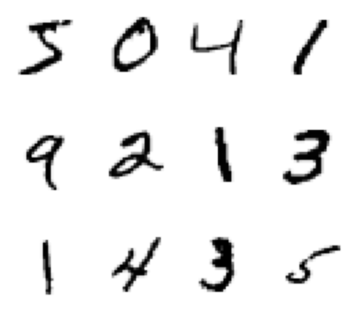

In [ ]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
X_valid.shape

(10000, 28, 28)

In [ ]:
y_valid.shape

(10000,)

In [ ]:
y_valid[0]

7

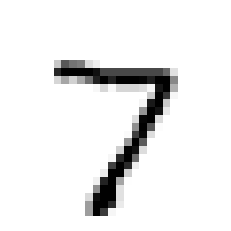

In [ ]:
plt.imshow(X_valid[0], cmap='Greys')
plt.axis('off')
plt.show()

In [ ]:
# Reshape (flatten) images 
X_train_reshaped = X_train.reshape(60000, 784).astype('float32')
X_valid_reshaped = X_valid.reshape(10000, 784).astype('float32')

# Scale images to the [0, 1] range
X_train_scaled_reshaped = X_train_reshaped / 255
X_valid_scaled_reshaped = X_valid_reshaped / 255

# Renaming for conciseness
X_training = X_train_scaled_reshaped
X_validation = X_valid_scaled_reshaped

print("X_training shape (after reshaping + scaling):", X_training.shape)
print(X_training.shape[0], "train samples")
print("X_validation shape (after reshaping + scaling):", X_validation.shape)
print(X_validation.shape[0], "validation samples")

X_training shape (after reshaping + scaling): (60000, 784)
60000 train samples
X_validation shape (after reshaping + scaling): (10000, 784)
10000 validation samples


In [ ]:
# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

In [ ]:
print(y_valid[0])
print(y_validation[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## PART 1 - Shallow neural network architecture

In [ ]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(64*784)

50176

In [ ]:
(64*784)+64

50240

In [ ]:
(10*64)+10

650

### Configure model

In [ ]:
model.compile(
    loss='mean_squared_error', 
    optimizer=SGD(learning_rate=0.01), 
    metrics=['accuracy']
)

### (OPTIONAL) TODO 2 

Try different options for `loss` and `optimizer`, for example:
```
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)
```

### Train!

In [ ]:
batch_size=128
epochs=500

history = model.fit(
  X_training, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_validation, y_validation)
)

Epoch 1/500
469/469 [==============================] - 7s 7ms/step - loss: 0.0926 - accuracy: 0.1048 - val_loss: 0.0921 - val_accuracy: 0.1041
Epoch 2/500
469/469 [==============================] - 3s 7ms/step - loss: 0.0916 - accuracy: 0.1120 - val_loss: 0.0914 - val_accuracy: 0.1157
Epoch 3/500
469/469 [==============================] - 2s 4ms/step - loss: 0.0910 - accuracy: 0.1371 - val_loss: 0.0908 - val_accuracy: 0.1485
Epoch 4/500
469/469 [==============================] - 2s 4ms/step - loss: 0.0905 - accuracy: 0.1681 - val_loss: 0.0904 - val_accuracy: 0.1778
Epoch 5/500
469/469 [==============================] - 2s 4ms/step - loss: 0.0900 - accuracy: 0.1949 - val_loss: 0.0899 - val_accuracy: 0.2022
Epoch 6/500
469/469 [==============================] - 2s 4ms/step - loss: 0.0896 - accuracy: 0.2173 - val_loss: 0.0895 - val_accuracy: 0.2228
Epoch 7/500
469/469 [==============================] - 2s 4ms/step - loss: 0.0892 - accuracy: 0.2351 - val_loss: 0.0891 - val_accuracy: 0.2398

### Plot learning curves

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


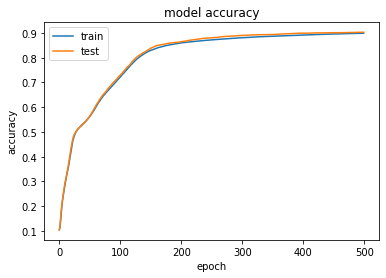

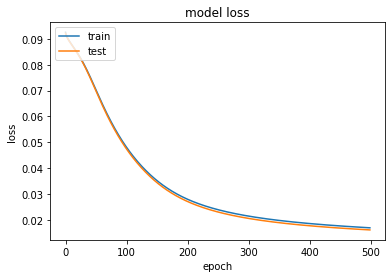

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evaluate the model

In [ ]:
model.evaluate(X_validation, y_validation)

313/313 [==============================] - 1s 2ms/step - loss: 0.0162 - accuracy: 0.9027


[0.01616216078400612, 0.9027000069618225]

### TODO 3

Write code to display the confusion matrix for your classifier and comment on the insights such confusion matrix provides.

See [this](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html) for an example.

### (OPTIONAL) TODO 4

Write code to display 10 cases where the classifier makes mistakes. Make sure to display both the true value as well as the predicted value.


## PART 2 - Convolutional neural network (CNN) architecture

In [ ]:
model_cnn = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

### Configure model

In [ ]:
model_cnn.compile(
    loss="categorical_crossentropy", 
    optimizer="adam", 
    metrics=["accuracy"]
)

### Prepare the data
The CNN does not expect the images to be flattened.

In [ ]:
# Reload the data, just in case
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

# Scale images to the [0, 1] range
X_train_cnn = X_train.astype("float32") / 255
X_valid_cnn = X_valid.astype("float32") / 255

# Redefine  dimension of train/test inputs
X_train_cnn = np.expand_dims(X_train_cnn, -1)
X_valid_cnn = np.expand_dims(X_valid_cnn, -1)

# Make sure images have shape (28, 28, 1)
print("x_train shape:", X_train_cnn.shape)
print(X_train_cnn.shape[0], "train samples")
print(X_valid_cnn.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Train!


In [ ]:
batch_size=128
epochs=15

history = model_cnn.fit(
  X_train_cnn, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_valid_cnn, y_validation)
)

Epoch 1/15
469/469 [==============================] - 10s 6ms/step - loss: 0.3376 - accuracy: 0.8977 - val_loss: 0.0826 - val_accuracy: 0.9744
Epoch 2/15
469/469 [==============================] - 3s 6ms/step - loss: 0.1026 - accuracy: 0.9690 - val_loss: 0.0560 - val_accuracy: 0.9828
Epoch 3/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0777 - accuracy: 0.9764 - val_loss: 0.0442 - val_accuracy: 0.9859
Epoch 4/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0665 - accuracy: 0.9790 - val_loss: 0.0370 - val_accuracy: 0.9876
Epoch 5/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0587 - accuracy: 0.9819 - val_loss: 0.0331 - val_accuracy: 0.9886
Epoch 6/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0519 - accuracy: 0.9835 - val_loss: 0.0327 - val_accuracy: 0.9879
Epoch 7/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0483 - accuracy: 0.9855 - val_loss: 0.0362 - val_accuracy: 0.9873
Epoch

### Plot learning curves

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


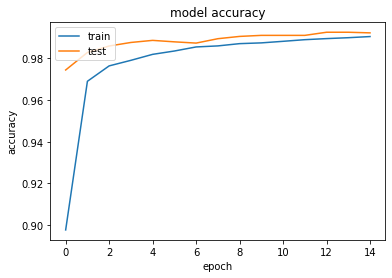

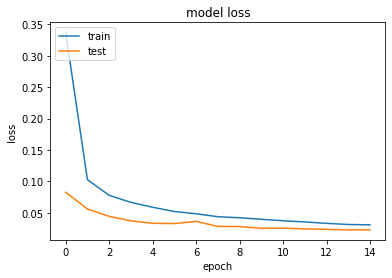

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evaluate the model

In [ ]:
model_cnn.evaluate(X_valid_cnn, y_validation)

313/313 [==============================] - 1s 3ms/step - loss: 0.0227 - accuracy: 0.9922


[0.02265302836894989, 0.9922000169754028]